In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequalityN.csv')
print(df.head().T)

                          0      1       2       3       4
type                  white  white   white   white   white
fixed acidity           7.0    6.3     8.1     7.2     7.2
volatile acidity       0.27    0.3    0.28    0.23    0.23
citric acid            0.36   0.34     0.4    0.32    0.32
residual sugar         20.7    1.6     6.9     8.5     8.5
chlorides             0.045  0.049    0.05   0.058   0.058
free sulfur dioxide    45.0   14.0    30.0    47.0    47.0
total sulfur dioxide  170.0  132.0    97.0   186.0   186.0
density               1.001  0.994  0.9951  0.9956  0.9956
pH                      3.0    3.3    3.26    3.19    3.19
sulphates              0.45   0.49    0.44     0.4     0.4
alcohol                 8.8    9.5    10.1     9.9     9.9
quality                   6      6       6       6       6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

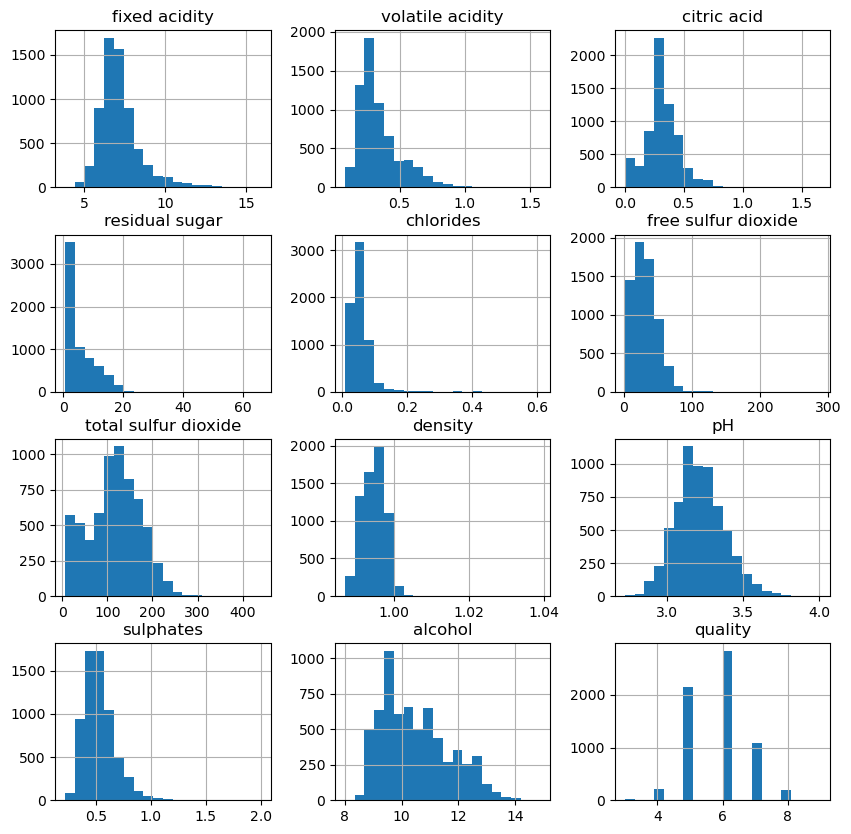

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

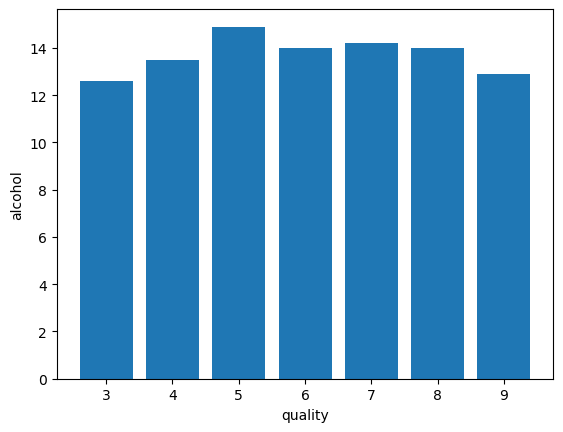

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [9]:
col = 'type'
df[col].dtype

dtype('O')

In [10]:
df[col].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [11]:
df.replace({'white': 1, 'red': 0}, inplace=True)

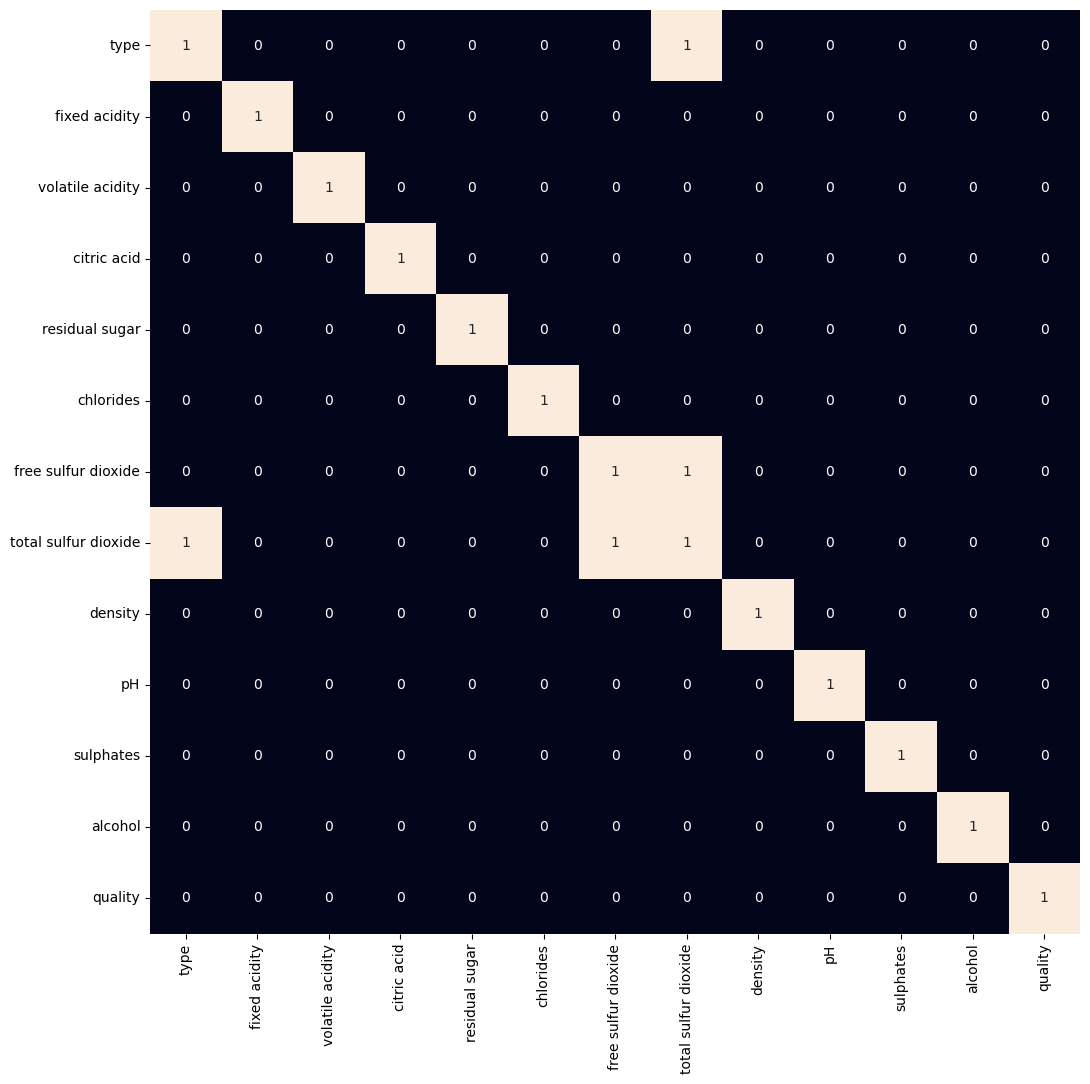

In [12]:
# Convert 'object' columns to numerical if they represent numbers
for col in df.columns:
    if df[col].dtype == 'O':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [13]:
df = df.drop('total sulfur dioxide', axis=1)

In [14]:
df.quality

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [15]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]
df.head().T

,0,1,2,3,4
type,1.000,1.000,1.0000,1.0000,1.0000
fixed acidity,7.000,6.300,8.1000,7.2000,7.2000
volatile acidity,0.270,0.300,0.2800,0.2300,0.2300
citric acid,0.360,0.340,0.4000,0.3200,0.3200
residual sugar,20.700,1.600,6.9000,8.5000,8.5000
chlorides,0.045,0.049,0.0500,0.0580,0.0580
free sulfur dioxide,45.000,14.000,30.0000,47.0000,47.0000
density,1.001,0.994,0.9951,0.9956,0.9956
pH,3.000,3.300,3.2600,3.1900,3.1900
sulphates,0.450,0.490,0.4400,0.4000,0.4000


In [16]:
#df.replace({'white': 1, 'red': 0}, inplace=True)

In [17]:
df.type

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [18]:
df.type.isnull().sum()

0

In [19]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

In [20]:
features.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
dtype: int64

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

# Impute missing values after splitting
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [23]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf'), DecisionTreeClassifier(random_state=42,max_depth=18), RandomForestClassifier(random_state=42,max_depth=15)]

for i in range(5):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7027810651830071
Validation Accuracy :  0.6949995402580684

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9735567052182403
Validation Accuracy :  0.8050515421787681

SVC() : 
Training Accuracy :  0.7069199304892986


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

LogisticRegression() : 


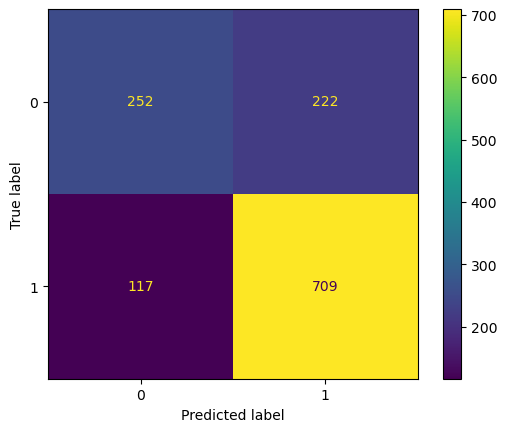


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 


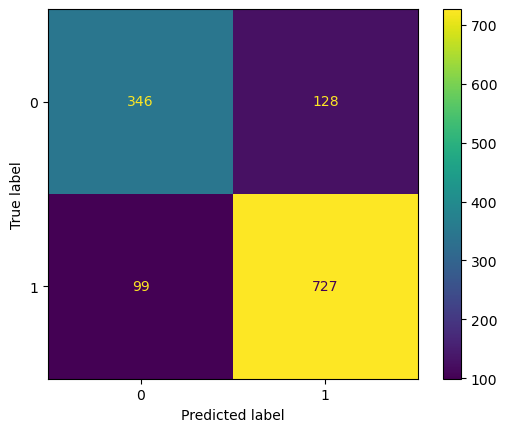


SVC() : 


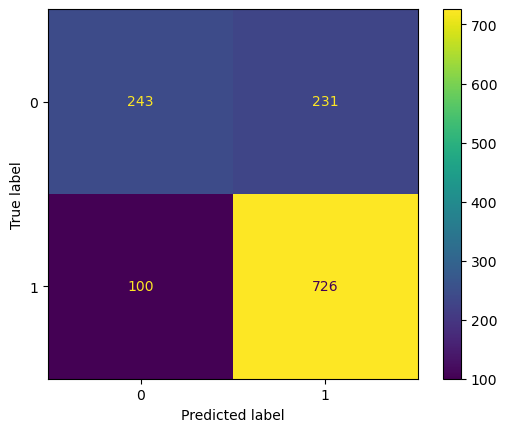


DecisionTreeClassifier(max_depth=18, random_state=42) : 


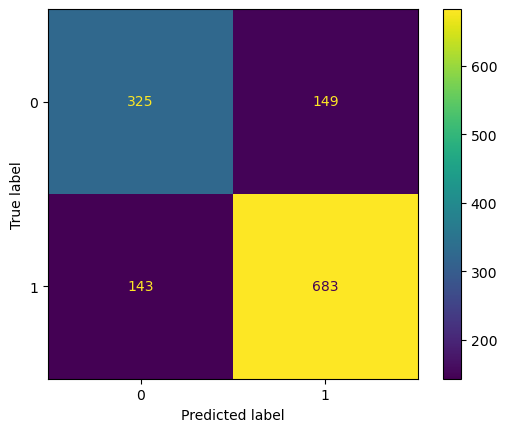


RandomForestClassifier(max_depth=15, random_state=42) : 


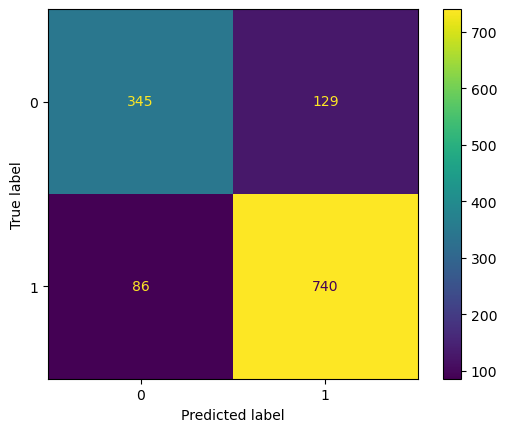

In [28]:
for i in range(5):
    print(f'{models[i]} : ')
    cm = confusion_matrix(ytest, models[i].predict(xtest))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[i].classes_) # Assuming your model has a 'classes_' attribute
    disp.plot()
    plt.show()
    print()

In [29]:
for i in range(5):
    print(f'{models[i]} : ')
    print(metrics.classification_report(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.86      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi